In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [2]:
import os
os.makedirs("/content/dataset")

# car with plate

In [3]:
!unzip "/content/drive/MyDrive/Dataset/plate_num.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/plate_num/aug/850_0_326.txt  
  inflating: /content/dataset/plate_num/aug/850_1_326.jpg  
  inflating: /content/dataset/plate_num/aug/850_1_326.txt  
  inflating: /content/dataset/plate_num/aug/850_2_326.jpg  
  inflating: /content/dataset/plate_num/aug/850_2_326.txt  
  inflating: /content/dataset/plate_num/aug/850_3_326.jpg  
  inflating: /content/dataset/plate_num/aug/850_3_326.txt  
  inflating: /content/dataset/plate_num/aug/850_4_326.jpg  
  inflating: /content/dataset/plate_num/aug/850_4_326.txt  
  inflating: /content/dataset/plate_num/aug/851_0_327.jpg  
  inflating: /content/dataset/plate_num/aug/851_0_327.txt  
  inflating: /content/dataset/plate_num/aug/851_1_327.jpg  
  inflating: /content/dataset/plate_num/aug/851_1_327.txt  
  inflating: /content/dataset/plate_num/aug/851_2_327.jpg  
  inflating: /content/dataset/plate_num/aug/851_2_327.txt  
  inflating: /content/dataset/plate_num/aug/851_3

In [4]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

In [5]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16026, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 16026 (delta 33), reused 41 (delta 25), pack-reused 15967
Receiving objects: 100% (16026/16026), 14.61 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (10999/10999), done.


In [6]:
!git clone https://github.com/tesseract-ocr/tessdata.git

Cloning into 'tessdata'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 769 (delta 0), reused 1 (delta 0), pack-reused 768
Receiving objects: 100% (769/769), 3.17 GiB | 26.18 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (172/172), done.


In [ ]:
!nvidia-smi


Tue Oct 24 05:32:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
%cd yolov5


/yolov5


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.7/644.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
pip install wandb


In [ ]:
!wandb login


wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin


In [8]:
trainimagePath = '/content/dataset/lp/train/images'
trainlabelPath = '/content/dataset/lp/train/labels'
valimagePath = '/content/dataset/lp/valid/images'
vallabelPath = '/content/dataset/lp/valid/labels'

In [9]:
os.makedirs(trainimagePath)
os.makedirs(trainlabelPath)
os.makedirs(valimagePath)
os.makedirs(vallabelPath)

In [ ]:
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]


crsPath = '/content/dataset/plate_num/aug' #dir where images and annotations stored


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.jpg'):
            xmls.append(filename)
        else:
            imgs.append(filename)



print("training images are : ",totalImgCount)


training images are :  1.0


In [11]:

# List all files in the source folder
files = os.listdir(crsPath)

# Iterate through the files and move images and text files to separate folders
for file in files:
    # Check if the file is an image (you might need to adjust the condition based on your image extensions)
    if file.endswith('.jpg') or file.endswith('.jpeg'):
        image_path = os.path.join(crsPath, file)
        shutil.move(image_path, os.path.join(valimagepath, file))
    # Check if the file is a text file (you might need to adjust the condition based on your text file extensions)
    elif file.endswith('.txt'):
        label_path = os.path.join(crsPath, file)
        shutil.move(label_path, os.path.join(vallabelpath, file))

print('Files moved successfully!')


Files moved successfully!


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data vehichle.yaml --weights yolov5n.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=vehichle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparame

In [ ]:
! sudo cp -v -r "/yolov5/runs/train/exp2" "/content/drive/MyDrive/GDSharer"

'/yolov5/runs/train/exp2' -> '/content/drive/MyDrive/GDSharer/exp2'
'/yolov5/runs/train/exp2/weights' -> '/content/drive/MyDrive/GDSharer/exp2/weights'
'/yolov5/runs/train/exp2/weights/best.pt' -> '/content/drive/MyDrive/GDSharer/exp2/weights/best.pt'
'/yolov5/runs/train/exp2/weights/last.pt' -> '/content/drive/MyDrive/GDSharer/exp2/weights/last.pt'
'/yolov5/runs/train/exp2/hyp.yaml' -> '/content/drive/MyDrive/GDSharer/exp2/hyp.yaml'
'/yolov5/runs/train/exp2/opt.yaml' -> '/content/drive/MyDrive/GDSharer/exp2/opt.yaml'
'/yolov5/runs/train/exp2/events.out.tfevents.1697777446.25ef73b2472b.4773.0' -> '/content/drive/MyDrive/GDSharer/exp2/events.out.tfevents.1697777446.25ef73b2472b.4773.0'
'/yolov5/runs/train/exp2/labels_correlogram.jpg' -> '/content/drive/MyDrive/GDSharer/exp2/labels_correlogram.jpg'
'/yolov5/runs/train/exp2/labels.jpg' -> '/content/drive/MyDrive/GDSharer/exp2/labels.jpg'
'/yolov5/runs/train/exp2/train_batch0.jpg' -> '/content/drive/MyDrive/GDSharer/exp2/train_batch0.jpg'


In [ ]:
!python train.py  --batch 16 --epochs 10 --data vehichle.yaml --weights yolov5x.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=vehichle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparame

In [ ]:
!python train.py  --batch 32 --epochs 10 --data vehichle.yaml --weights yolov5n.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=vehichle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/yolov5/train.py", line 647, in <module>
 

# plate with number

In [ ]:
trainimagePath = '/content/dataset/lp/train/images'
trainlabelPath = '/content/dataset/lp/train/labels'
valimagePath = '/content/dataset/lp/valid/images'
vallabelPath = '/content/dataset/lp/valid/labels'

In [ ]:
os.makedirs(trainimagePath)
os.makedirs(trainlabelPath)
os.makedirs(valimagePath)
os.makedirs(vallabelPath)

FileExistsError: ignored

In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]


crsPath = '/content/dataset/plate_num/Bangla_License_Plate' #dir where images and annotations stored


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.jpg'):
            xmls.append(filename)
        else:
            imgs.append(filename)



print("training images are : ",totalImgCount)


training images are :  1665.0


In [ ]:
import os
import shutil

# List all files in the source folder
files = os.listdir(crsPath)

# Iterate through the files and move images and text files to separate folders
for file in files:
    # Check if the file is an image (you might need to adjust the condition based on your image extensions)
    if file.endswith('.jpg') or file.endswith('.jpeg'):
        image_path = os.path.join(crsPath, file)
        shutil.move(image_path, os.path.join(valimagePath, file))
    # Check if the file is a text file (you might need to adjust the condition based on your text file extensions)
    elif file.endswith('.txt'):
        label_path = os.path.join(crsPath, file)
        shutil.move(label_path, os.path.join(vallabelPath, file))

print('Files moved successfully!')


Files moved successfully!


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data vehicle.yaml --weights yolov5n.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2023-10-24 05:49:21.830059: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 05:49:21.830120: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 05:49:21.830157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=vehicle.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, i

## Detect License Plate

In [ ]:
!python detect.py --weights /content/drive/MyDrive/GDSharer/exp2/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Dataset/363368756_2573965512760724_6053777707951410474_n.jpg

detect: weights=['/content/drive/MyDrive/GDSharer/exp2/weights/best.pt'], source=/content/drive/MyDrive/Dataset/363368756_2573965512760724_6053777707951410474_n.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-228-g4d687c8 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
test_images/363368756_2573965512760724_6053777707951410474_n.jpg
There is no detected object
image 1/1 /content/drive/MyDrive/Dataset/363368756_2573965512760724_6053777707951410474_n.jpg: 416x320 1 LP, 74.6ms
Speed: 1.2ms pre-process, 74.6ms inference, 1.6ms NMS per ima

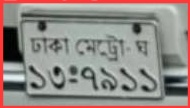

In [ ]:

#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/yolov5/test_images/363368756_2573965512760724_6053777707951410474_n.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,777 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:

import pytesseract
import cv2


In [ ]:
## From the error messaage, we can see that pytesessaract is installed in the directory called '/usr/share/tesseract-ocr'
# it is trying to search for the language file in the following directory
filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames)

['configs', 'tessconfigs', 'pdf.ttf', 'eng.traineddata', 'osd.traineddata']


In [ ]:
!git clone https://github.com/tesseract-ocr/tessdata.git

Cloning into 'tessdata'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 769 (delta 0), reused 1 (delta 0), pack-reused 768
Receiving objects: 100% (769/769), 3.17 GiB | 21.05 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (172/172), done.


In [ ]:

filenames = os.listdir('/usr/share/tesseract-ocr/4.00/tessdata/')
print(filenames) # check that the file is added in this directory which was not present before.


['configs', 'tessconfigs', 'pdf.ttf', 'Bengali.traineddata', 'eng.traineddata', 'osd.traineddata']


In [ ]:
img3 = cv2.imread('/yolov5/test_images/363368756_2573965512760724_6053777707951410474_n.jpg')
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
ret,thresh3 = cv2.threshold(img3,140,255,cv2.THRESH_BINARY)  # binary thresholding

In [ ]:
## this function shows two images side-by-side
# this function will plot two images side by side
def plot_two_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2= fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

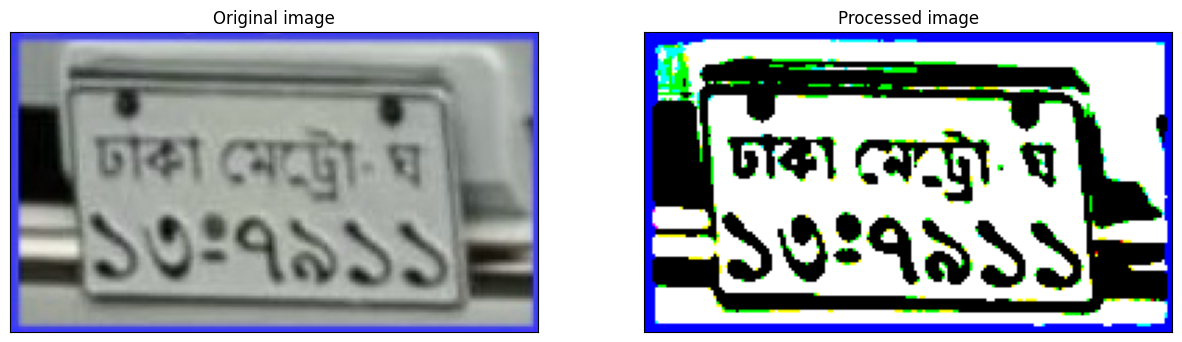

In [ ]:
plot_two_images(img3, thresh3, 'Original image', 'Processed image')


In [ ]:
text = pytesseract.image_to_string(thresh3 , lang ="Bengali" )


In [ ]:
print(text)

ঢাকা মেট্রো- ঘ
১৩:৭৯১১

